In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from dataloader.Flickr8k import Flickr8kDataset

In [2]:
# Load data 
PATH = './datasets/'
images_dir = '/Images/'

# Convert to dataframe
df = pd.read_csv(os.path.join(PATH, 'captions.txt'))
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


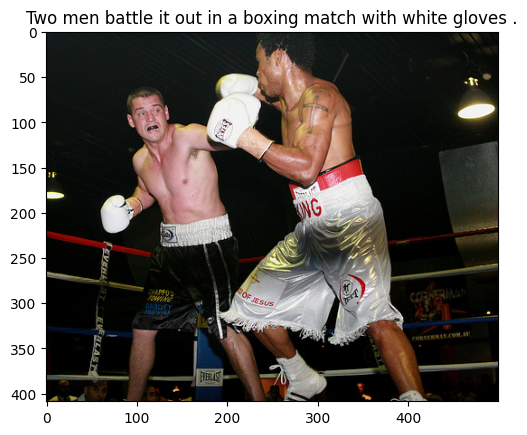

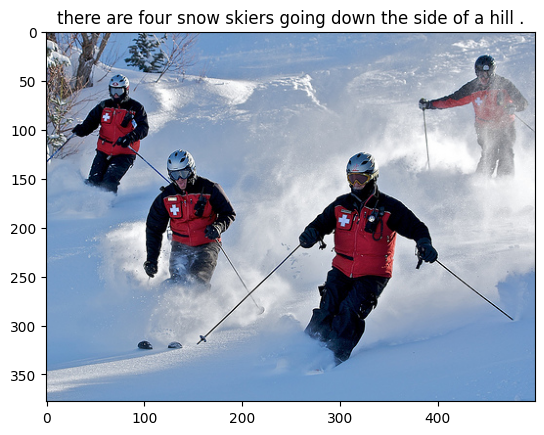

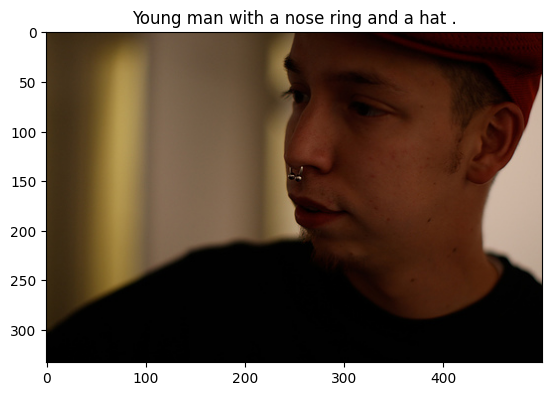

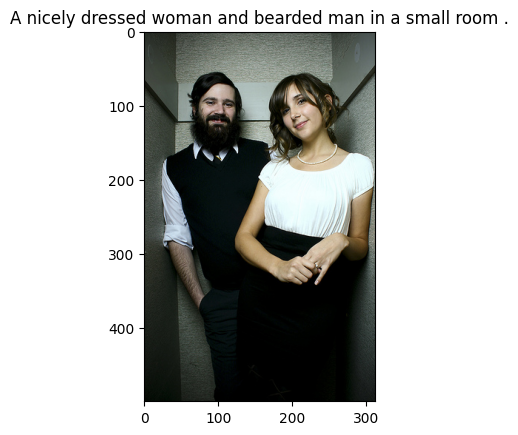

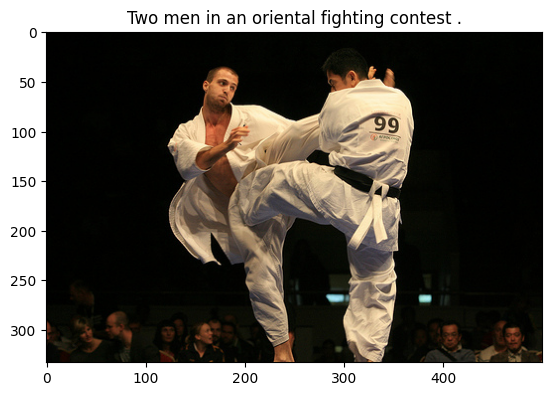

In [10]:
# Visualize data
import random

print_images = 5
for _ in range(print_images):
    i = random.randint(0, len(df))
    image_path = os.path.join(images_dir, df['image'][i])
    image = Image.open(os.path.join(PATH + image_path))
    plt.imshow(image)
    plt.title(df['caption'][i])
    plt.show()

In [3]:
flickr8k = Flickr8kDataset(PATH, df, None, None)

In [4]:
flickr8k[0]

(tensor([[[0.3216, 0.4353, 0.4549,  ..., 0.0157, 0.0235, 0.0235],
          [0.3098, 0.4431, 0.4667,  ..., 0.0314, 0.0275, 0.0471],
          [0.3020, 0.4588, 0.4745,  ..., 0.0314, 0.0275, 0.0392],
          ...,
          [0.7294, 0.5882, 0.6706,  ..., 0.8314, 0.6471, 0.6471],
          [0.6902, 0.6941, 0.8627,  ..., 0.8235, 0.6588, 0.6588],
          [0.8118, 0.8196, 0.7333,  ..., 0.8039, 0.6549, 0.6627]],
 
         [[0.3412, 0.5020, 0.5255,  ..., 0.0118, 0.0235, 0.0314],
          [0.3294, 0.5059, 0.5412,  ..., 0.0353, 0.0392, 0.0824],
          [0.3098, 0.5176, 0.5529,  ..., 0.0353, 0.0510, 0.0863],
          ...,
          [0.4235, 0.3137, 0.4784,  ..., 0.8667, 0.7255, 0.7216],
          [0.3765, 0.5059, 0.6627,  ..., 0.8549, 0.7216, 0.7216],
          [0.4941, 0.5804, 0.4784,  ..., 0.8392, 0.7216, 0.7216]],
 
         [[0.3804, 0.4902, 0.4980,  ..., 0.0118, 0.0157, 0.0196],
          [0.3608, 0.5059, 0.5176,  ..., 0.0275, 0.0235, 0.0235],
          [0.3647, 0.5255, 0.5333,  ...,

In [11]:
import torch
loader = torch.utils.data.DataLoader(flickr8k, 
                                     batch_size=32,
                                     shuffle=True)

In [12]:
next(iter(loader))

[tensor([[[[0.8275, 0.5804, 0.4510,  ..., 0.0314, 0.0392, 0.0314],
           [0.8471, 0.6667, 0.5804,  ..., 0.0392, 0.0510, 0.0549],
           [0.8510, 0.7765, 0.7294,  ..., 0.0510, 0.0627, 0.0667],
           ...,
           [0.2549, 0.3020, 0.3373,  ..., 0.3176, 0.2902, 0.2706],
           [0.2706, 0.3020, 0.3176,  ..., 0.3098, 0.3020, 0.2980],
           [0.2941, 0.3098, 0.3059,  ..., 0.2980, 0.3098, 0.3137]],
 
          [[0.8510, 0.6392, 0.5098,  ..., 0.0549, 0.0627, 0.0588],
           [0.8863, 0.7255, 0.6353,  ..., 0.0627, 0.0706, 0.0745],
           [0.8902, 0.8157, 0.7765,  ..., 0.0745, 0.0784, 0.0863],
           ...,
           [0.4196, 0.4745, 0.5216,  ..., 0.4941, 0.4588, 0.4392],
           [0.4353, 0.4706, 0.4941,  ..., 0.4784, 0.4706, 0.4667],
           [0.4588, 0.4745, 0.4745,  ..., 0.4667, 0.4784, 0.4824]],
 
          [[0.8627, 0.6549, 0.5255,  ..., 0.0667, 0.0706, 0.0667],
           [0.8941, 0.7373, 0.6510,  ..., 0.0667, 0.0784, 0.0863],
           [0.8980, 0.82

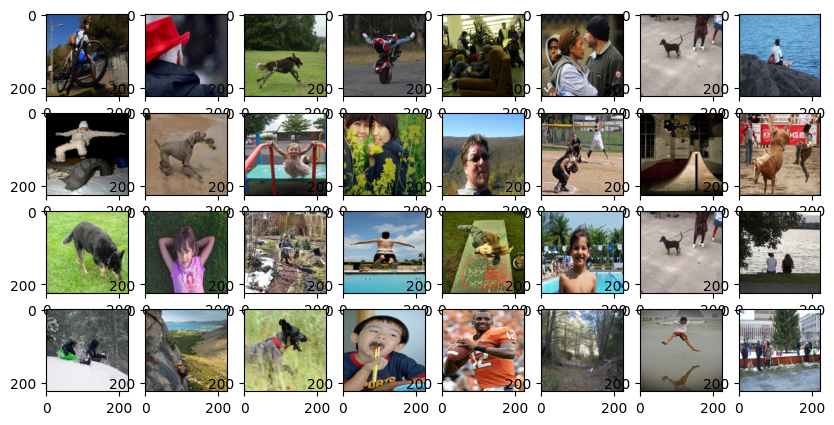

In [13]:
plt.figure(figsize=(10, 10))
images, caption = next(iter(loader))
for i in range(32):
    plt.subplot(8, 8, i+1)
    img = images[i].numpy().transpose(1, 2, 0)
    plt.imshow(img)
plt.show()